The US Department of Agriculture makes available a database of food nutrient infor- mation. Ashley Williams, an English hacker, has made available a version of this da- tabase in JSON format (http://ashleyw.co.uk/project/food-nutrient-database). The re- cords look like this:

{ "id": 21441, "description": "KENTUCKY FRIED CHICKEN, Fried Chicken, EXTRA CRISPY, Wing, meat and skin with breading", "tags": ["KFC"], "manufacturer": "Kentucky Fried Chicken", "group": "Fast Foods", "portions": [ { "amount": 1, "unit": "wing, with skin", "grams": 68.0 },

...
], "nutrients": [ { "value": 20.8, "units": "g", "description": "Protein", "group": "Composition" },

...
] }

Each food has a number of identifying attributes along with two lists of nutrients and portion sizes. Having the data in this form is not particularly amenable for analysis, so we need to do some work to wrangle the data into a better form.

Step 1: Download and upload the json file into Google Colab

Step 2: Load the json file into a Python Dictionary "db" with json library

In [2]:
import json
db = json.load(open('database.json'))
len(db)

6636

Each entry in db is a dict containing all the data for a single food. The 'nutrients' field is a list of dicts, one for each nutrient:

Step 3: Check the keys in dict db in first row.

In [9]:
!head database.json

[{"id":1008,"description":"Cheese, caraway","tags":[],"manufacturer":"","group":"Dairy and Egg Products","portions":[{"amount":1,"unit":"oz","grams":28.35}],"nutrients":[{"value":25.18,"units":"g","description":"Protein","group":"Composition"},{"value":29.2,"units":"g","description":"Total lipid (fat)","group":"Composition"},{"value":3.06,"units":"g","description":"Carbohydrate, by difference","group":"Composition"},{"value":3.28,"units":"g","description":"Ash","group":"Other"},{"value":376.0,"units":"kcal","description":"Energy","group":"Energy"},{"value":39.28,"units":"g","description":"Water","group":"Composition"},{"value":1573.0,"units":"kJ","description":"Energy","group":"Energy"},{"value":0.0,"units":"g","description":"Fiber, total dietary","group":"Composition"},{"value":673.0,"units":"mg","description":"Calcium, Ca","group":"Elements"},{"value":0.64,"units":"mg","description":"Iron, Fe","group":"Elements"},{"value":22.0,"units":"mg","description":"Magnesium, Mg","group":"Eleme

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



"g","description":"Serine","group":"Amino Acids"}]},{"id":8085,"description":"Cereals ready-to-eat, QUAKER, KRETSCHMER Honey Crunch Wheat Germ","tags":[],"manufacturer":"The Quaker Oats, Co.","group":"Breakfast Cereals","portions":[{"amount":1,"unit":"tbsp (1 NLEA serving)","grams":14.0}],"nutrients":[{"value":26.55,"units":"g","description":"Protein","group":"Composition"},{"value":7.78,"units":"g","description":"Total lipid (fat)","group":"Composition"},{"value":58.11,"units":"g","description":"Carbohydrate, by difference","group":"Composition"},{"value":4.14,"units":"g","description":"Ash","group":"Other"},{"value":372.0,"units":"kcal","description":"Energy","group":"Energy"},{"value":0.0,"units":"g","description":"Alcohol, ethyl","group":"Other"},{"value":3.4,"units":"g","description":"Water","group":"Composition"},{"value":0.0,"units":"mg","description":"Caffeine","group":"Other"},{"value":0.0,"units":"mg","description":"Theobromine","group":"Other"},{"value":1558.0,"units":"kJ","

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



"units":"mg","description":"Vitamin C, total ascorbic acid","group":"Vitamins"},{"value":0.095,"units":"mg","description":"Thiamin","group":"Vitamins"},{"value":0.03,"units":"mg","description":"Riboflavin","group":"Vitamins"},{"value":0.158,"units":"mg","description":"Niacin","group":"Vitamins"},{"value":0.071,"units":"mg","description":"Pantothenic acid","group":"Vitamins"},{"value":0.061,"units":"mg","description":"Vitamin B-6","group":"Vitamins"},{"value":0.0,"units":"mcg","description":"Folate, total","group":"Vitamins"},{"value":0.0,"units":"mcg","description":"Folate, food","group":"Vitamins"},{"value":0.0,"units":"g","description":"Fatty acids, total trans","group":"Other"},{"value":0.0,"units":"g","description":"Fatty acids, total saturated","group":"Other"},{"value":0.0,"units":"g","description":"Fatty acids, total monounsaturated","group":"Other"},{"value":0.0,"units":"g","description":"Fatty acids, total polyunsaturated","group":"Other"},{"value":0.0,"units":"g","description

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



oup":"Elements"},{"value":0.213,"units":"mg","description":"Manganese, Mn","group":"Elements"},{"value":1.7,"units":"mcg","description":"Selenium, Se","group":"Elements"},{"value":865.0,"units":"IU","description":"Vitamin A, IU","group":"Vitamins"},{"value":0.0,"units":"mcg","description":"Retinol","group":"Vitamins"},{"value":43.0,"units":"mcg_RAE","description":"Vitamin A, RAE","group":"Vitamins"},{"value":514.0,"units":"mcg","description":"Carotene, beta","group":"Vitamins"},{"value":9.0,"units":"mcg","description":"Carotene, alpha","group":"Vitamins"},{"value":0.38,"units":"mg","description":"Vitamin E (alpha-tocopherol)","group":"Vitamins"},{"value":0.0,"units":"IU","description":"Vitamin D","group":"Vitamins"},{"value":0.0,"units":"mcg","description":"Vitamin D (D2 + D3)","group":"Vitamins"},{"value":0.0,"units":"mcg","description":"Cryptoxanthin, beta","group":"Vitamins"},{"value":0.0,"units":"mcg","description":"Lycopene","group":"Vitamins"},{"value":1350.0,"units":"mcg","descr

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [11]:
db[0].keys()

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

Step 4: Check the keys in "nutrients" in first row.

In [13]:
db[0]['nutrients'][0]

{'description': 'Protein',
 'group': 'Composition',
 'units': 'g',
 'value': 25.18}

Step 5: Convert "nutrients" of first row into a Dataframe called as nutrients.

In [23]:
import pandas as pd
nutrients = pd.DataFrame([db[0]['nutrients'][0]])
nutrients

value units description        group
0  25.18     g     Protein  Composition

Step 6: Build another DataFrame info by extracting 'description','group','id' and 'manufacture'.

In [33]:
a = pd.DataFrame(db,columns = ['description','group','id','manufacturer'])
a

description  ... manufacturer
0                                       Cheese, caraway  ...             
1                                       Cheese, cheddar  ...             
2                                          Cheese, edam  ...             
3                                          Cheese, feta  ...             
4                    Cheese, mozzarella, part skim milk  ...             
...                                                 ...  ...          ...
6631                             Bologna, beef, low fat  ...             
6632  Turkey and pork sausage, fresh, bulk, patty or...  ...             
6633                              Babyfood, juice, pear  ...         None
6634         Babyfood, dessert, banana yogurt, strained  ...         None
6635              Babyfood, banana no tapioca, strained  ...         None

[6636 rows x 4 columns]

Step 7: Check the distribution of food groups with value_counts.

In [34]:
a.value_counts(['group'])

group                            
Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Legumes and Legume Products          365
Fast Foods                           365
Lamb, Veal, and Game Products        345
Sweets                               341
Fruits and Fruit Juices              328
Pork Products                        328
Beverages                            278
Soups, Sauces, and Gravies           275
Finfish and Shellfish Products       255
Baby Foods                           209
Cereal Grains and Pasta              183
Ethnic Foods                         165
Snacks                               162
Nut and Seed Products                128
Poultry Products                     116
Sausages and Luncheon Meats          111
Dairy and Egg Products               107
Fats and Oils                         97
Meals, Entrees, and Sidedishes        57
Restaurant Foods       

Step 8: Let us assemble the nutrients for each food into a single large table nutrients. First, covert each list of food nutrients to a DataFrame, add a column for the food id, and append the DataFrame to a list. Then, these can be concatenated together with concat.

In [47]:
nutrients = []
for rec in db:
  fnuts = pd.DataFrame(rec['nutrients'])
  fnuts['id']=rec['id']
  nutrients.append(fnuts)

nutrients=pd.concat(nutrients,ignore_index=True)

In [46]:
nutrients

[       value units                         description        group    id
 0     25.180     g                             Protein  Composition  1008
 1     29.200     g                   Total lipid (fat)  Composition  1008
 2      3.060     g         Carbohydrate, by difference  Composition  1008
 3      3.280     g                                 Ash        Other  1008
 4    376.000  kcal                              Energy       Energy  1008
 ..       ...   ...                                 ...          ...   ...
 157    1.472     g                              Serine  Amino Acids  1008
 158   93.000    mg                         Cholesterol        Other  1008
 159   18.584     g        Fatty acids, total saturated        Other  1008
 160    8.275     g  Fatty acids, total monounsaturated        Other  1008
 161    0.830     g  Fatty acids, total polyunsaturated        Other  1008
 
 [162 rows x 5 columns],
        value units                         description        group    i

If all goes well, nutrients should look like this:

<class 'pandas.core.frame.DataFrame'> 
Int64Index: 389355 entries, 0 to 389354 
Data columns:
description 389855 non-null values
group 389855 non-null values
units 389855 non-null values
value 389855 non-null values
id 389855 non-null values
dtypes: float64(1), int64(1), object(3)

Step 9: Drop duplicates in this DataFrame

In [49]:
nutrients.drop_duplicates()

value units                         description        group     id
0        25.180     g                             Protein  Composition   1008
1        29.200     g                   Total lipid (fat)  Composition   1008
2         3.060     g         Carbohydrate, by difference  Composition   1008
3         3.280     g                                 Ash        Other   1008
4       376.000  kcal                              Energy       Energy   1008
...         ...   ...                                 ...          ...    ...
389350    0.000   mcg                 Vitamin B-12, added     Vitamins  43546
389351    0.000    mg                         Cholesterol        Other  43546
389352    0.072     g        Fatty acids, total saturated        Other  43546
389353    0.028     g  Fatty acids, total monounsaturated        Other  43546
389354    0.041     g  Fatty acids, total polyunsaturated        Other  43546

[375176 rows x 5 columns]

Step 10: Since 'group' and 'description' is in both DataFrame objects, we can rename them to make it clear what is what.
info: --> fgroup, food
nutrients: --> nutgroup, nutrient

In [50]:
nutrients=nutrients.rename(columns={'group': 'nutgroup','description': 'nutrient'})
nutrients
info=info.rename(columns={'group': 'fgroup','description': 'food'})
info

food  ... manufacturer
0                                       Cheese, caraway  ...             
1                                       Cheese, cheddar  ...             
2                                          Cheese, edam  ...             
3                                          Cheese, feta  ...             
4                    Cheese, mozzarella, part skim milk  ...             
...                                                 ...  ...          ...
6631                             Bologna, beef, low fat  ...             
6632  Turkey and pork sausage, fresh, bulk, patty or...  ...             
6633                              Babyfood, juice, pear  ...         None
6634         Babyfood, dessert, banana yogurt, strained  ...         None
6635              Babyfood, banana no tapioca, strained  ...         None

[6636 rows x 4 columns]

Step 11: Merge info with nutrients. Call new dataframe as ndata.

In [51]:
ndata = pd.merge(nutrients,info,on='id',how='outer')
ndata

value units  ...                  fgroup manufacturer
0        25.180     g  ...  Dairy and Egg Products             
1        29.200     g  ...  Dairy and Egg Products             
2         3.060     g  ...  Dairy and Egg Products             
3         3.280     g  ...  Dairy and Egg Products             
4       376.000  kcal  ...  Dairy and Egg Products             
...         ...   ...  ...                     ...          ...
389350    0.000   mcg  ...              Baby Foods         None
389351    0.000    mg  ...              Baby Foods         None
389352    0.072     g  ...              Baby Foods         None
389353    0.028     g  ...              Baby Foods         None
389354    0.041     g  ...              Baby Foods         None

[389355 rows x 8 columns]

Step 12: Get a plot of median values by food group and nutrient type.

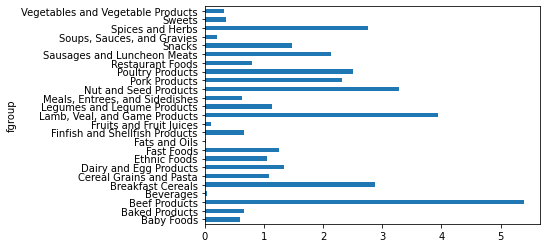

In [52]:
result = ndata.groupby(['nutrient','fgroup'])['value'].median()
result['Zinc, Zn'].plot(kind='barh')

Step 13: How do we know which food is most dense in each nutrient.

Step 14: The resulting DataFrame is a bit too large to display in the book; can you show just the 'Amino Acids' nutrient group?